<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

# Controle de Tensão - Sistema de AMPOPs
## Controle Digital (ELE0531) - Unidade 3

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

> Professor: Aldayr Dantas de Araújo

![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

### <ins>Apresentação do Problema</ins>

Sistema com dois amplificadores operacionais ligados em cascata. O primeiro AMPOP é montado como um integrador inversor ideal, enquanto que o segundo, é montado como um integrador passa baixas.

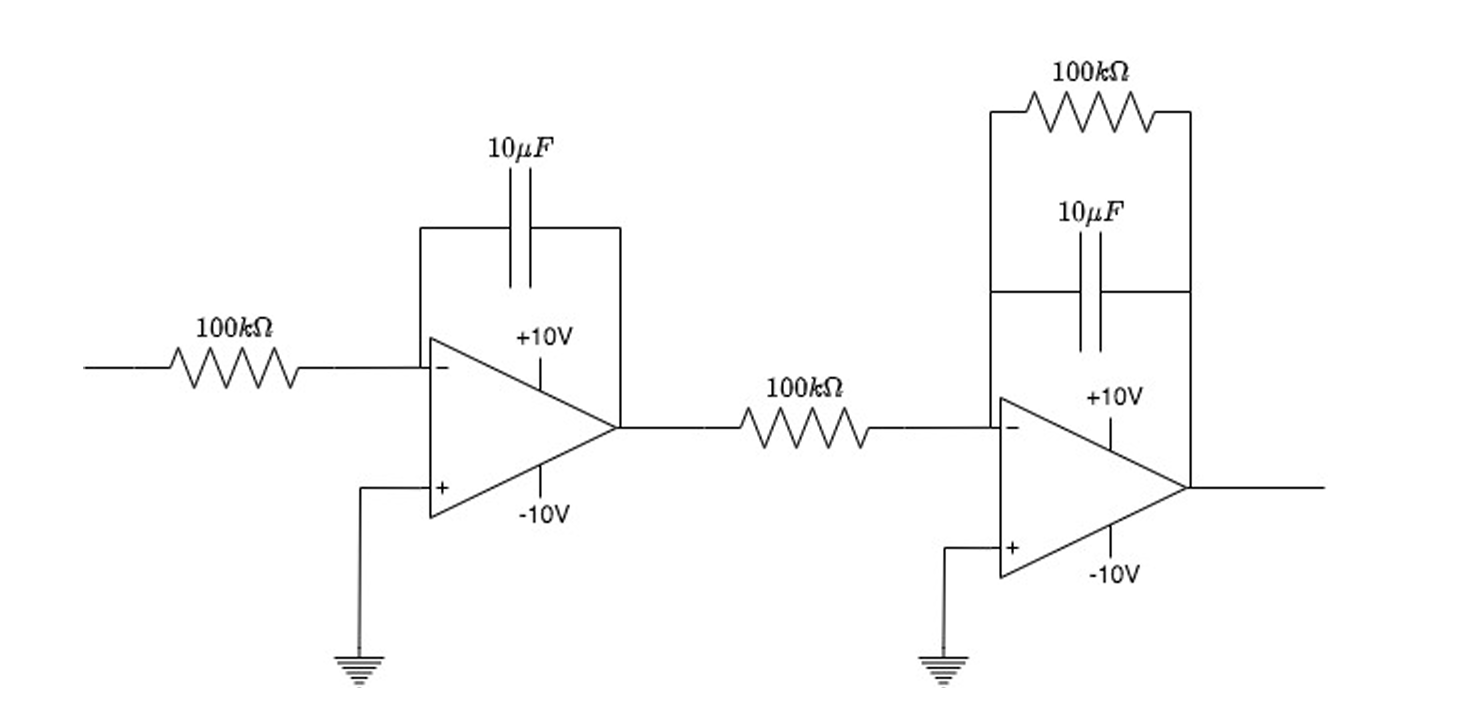

### <ins>Modelagem da Planta</ins>

Analisando o primeiro AMPOP na frequência, temos um amplificador inversor:

$V_A(s) = -\dfrac{X_c}{R_A}V_i(s) \implies V_A(s) = -\dfrac{\frac{1}{sC_A}}{R_A}V_i(s) \implies V_A(s) = -\dfrac{1}{R_AC_As}V_i(s)$


O segundo consiste em um integrador passa baixas. Portanto, sua saída será:

$V_o(s) = -\dfrac{1}{R_{B1}}\left(\dfrac{1}{\frac{1}{R_{B2}}+ \frac{1}{X_B}} \right)V_A(s) \implies V_o(s) = -\dfrac{1}{\frac{R_{B1}}{R_{B2}}+ \frac{R_{B1}}{X_B}} V_A(s) $

Logo:

$V_o(s) = \dfrac{1}{1 + 100K \cdot 10\mu s} \dfrac{1}{100k\cdot 10\mu s} V_i(s)$

Assim:

$V_o(s) = \dfrac{1}{s(s+1)}V_i(s)$

Então, a função de transferência contínua é:

\begin{align*}
G(s) = \dfrac{1}{s(s+1)}
\end{align*}

### <ins>Análise do Controlador</ins>

Será projetado um controlador para garantir:
- Erro de regime nulo;
- Tempo de estabilização em 2% da referência para no máximo 2s;
- Percentual de overshoot de no máximo 20% do valor de referência.

#### Análise do Regime Permanente
Como a planta é de segunda ordem e possui um pólo na origem (tipo 1), não temos erro de regime.

#### Análise do transitório
Podemos fechar a malha fazendo uma realimentação unitária para analisar o transitório:

$G_f(s) = \dfrac{\omega_n^2}{s^2 + 2\xi \omega_n s + \omega_n^2} = \dfrac{1}{s^2 + s + 1}$, ou seja, $\omega_n = 1$ e $\xi = \frac{1}{2}$.

- Percentual de Overshoot: $PO(\%) = e^{\dfrac{-\xi\pi}{\sqrt{1-\xi^2}}}\cdot 100 \implies PO(\%) = 16,3033 \,\,\%$

- Tempo de Estabilização: $T_{s2\%} = \dfrac{4}{\xi \omega_n} \implies \dfrac{4}{0,5} \implies T_{s2\%} = 8 \,\,s$

Dada essas características, precisa-se de um ***CONTROLADOR PROPORCIONAL DERIVATIVO (PD)***

### <ins>Projeto do Controlador Analógico</ins>

Um controlador PD será projetado: $G_c(s) = K_c\tau_d(s + \dfrac{1}{\tau_d}) = K_c(1+\tau_d s)$.

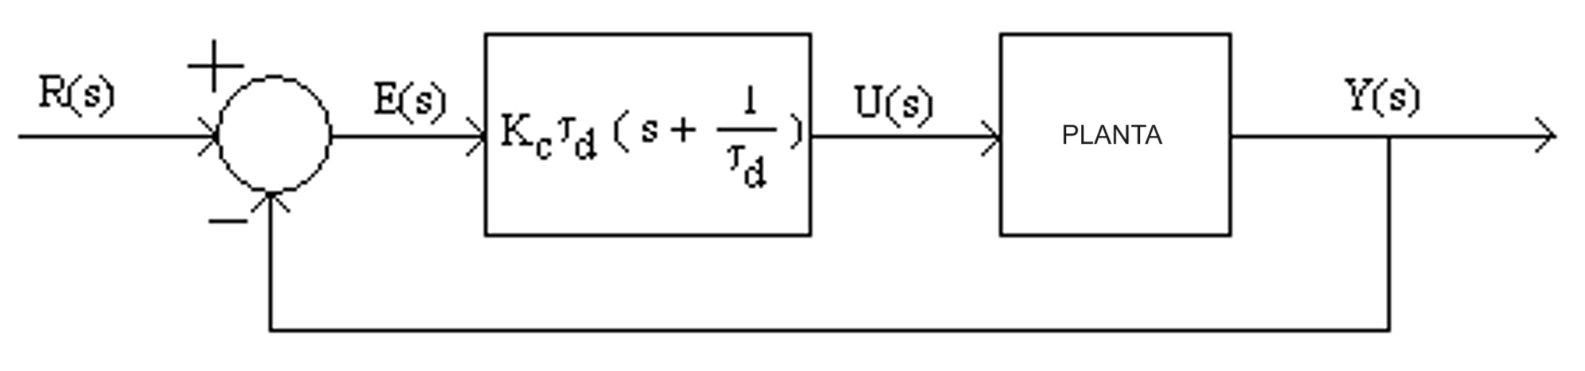

Anteriormente, observou-se que o percentual de overshoot atendia aos requisitos, então, pode-se manter o valor de $\xi$ e modificar o $\omega_n$ de tal forma que se mantenha $\xi=\dfrac{1}{2}$ e se obtenha o tempo de estabilização $T_{s2\%}=2$ desejado:

$T_{s2\%} = \dfrac{4}{\xi \omega_n} \implies 2 = \dfrac{4}{0,5\omega_n}  \implies \omega_n = 4$


Logo:

$a^*(s) = s^2 + 4s + 16 $

Usando a equação diofantina têm-se:

$K_c + K_c\tau_Ds + s^2 + s = s^2 + 4s + 16 \implies$

$s^2 + s(1+K_c\tau_D) + K_c = s^2 + 4s + 16 \implies$

$K_c = 16 \,\,e \,\, \tau_D = 0,1875$.

Portanto, o controlador será: 

\begin{align*}
G_c(s) = 3s + 16
\end{align*}

### Discretização do Controlador Analógico

Anteriormente, o controlador analógico foi projetado. Com isso, sua discretização é feita para se obter o controlador discreto.

- Aplicando a ***Aproximação por Diferença Finita Anterior ou Diferença Finita para Trás***:
\begin{align*}
G_c(z) = G_c(s)|_{s=\dfrac{z-1}{hz}} \implies\\
G_c(z) = 3 \left[ \dfrac{z-1}{hz} \right ] + 16 \implies\\
K_c = 16 \,\,e \,\, \tau_D = 0,1875
\end{align*}

Os parâmetros encontrados são iguais ao caso analógico.

\begin{align*}
G_c(z) = \dfrac{(3+16h)z-3}{zh} \implies\\
G_c(z) = \dfrac{-3z^{-1} + 3 + 16h}{h} \implies\\
\left [h \right ]U(z) = \left [-3z^{-1} + 3 + 16h \right ]E(z)
\end{align*}

- Aplicando a transformada de z inversa:
\begin{align*}
hu(k) = -3e(k-1) + \left[3+16h\right]e(k) \implies\\
u(k) = \left[-\dfrac{3}{h}\right]e(k-1) + \left[16 + \dfrac{3}{h}\right]e(k)
\end{align*}

### <ins>Algoritmo de Controle</ins>

Vamos implementar o algoritmo de controle utilizando $0.001$ como a taxa de amostragem e $1V$ como a referência de tensão.

```C
//inicialização dos parâmetros
h=0.001;
uold=0.0;
eold=0.0;
r=1.0;
while(){
    y=vin1();  //ler entrada conversor A/D
    e=r-y;
    u=((16+(3/h))*e)-((3/h)*eold)
    uold=u;
    eold=e;
    vout1(u);  //envia u para a saída do conversor D/A
};
```


### <ins>Simulações</ins>

- SEM SATURADOR

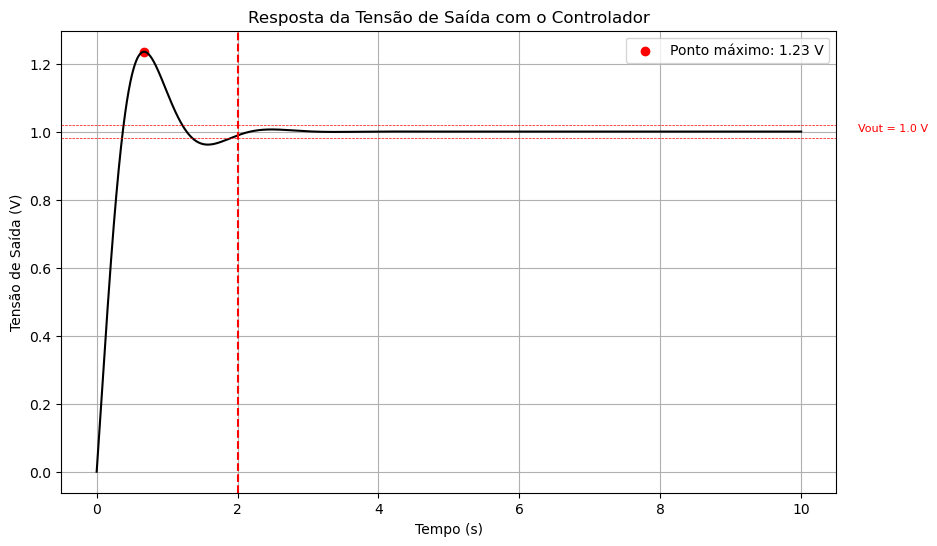

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

h = 0.001  # AMOSTRAGEM
sim_time = 10  # TEMPO DE SIMULAÇÃO
setpoint = 1.0  # REFERÊNCIA

# Função que descreve a equação diferencial da planta
def plant(y, t, u):
    v, dvdt = y
    ddvdt = u - dvdt
    return [dvdt, ddvdt]

# ---------------- Parâmetros do controlador PID ---------------------
Td = 0.1875      # Definir
Kc = 16          # Definir

kp = Kc
ki = 0
kd = Kc * Td

# ----------------------- Inicialização ------------------------------
time = np.arange(0, sim_time, h)
prev_error = 0
integral = prev_error * h

position = np.zeros_like(time)
velocity = np.zeros_like(time)
u_array = np.zeros_like(time)

# ----------------------- Simulação ---------------------------------
for i in range(1, len(time)):
    # Calcule o erro
    error = setpoint - position[i - 1]

    # Calcule a integral e o derivativo
    integral += error * h
    derivative = (error - prev_error) / h

    # Calcule o sinal de controle usando o controlador PID
    u= kp * error + ki * integral + kd * derivative
    u_array[i] = u
    
    # MANDAR DO CONVERSOR D/A PARA A PLANTA
    # Integre a equação diferencial usando odeint
    y0 = [position[i - 1], velocity[i - 1]]
    y = odeint(plant, y0, [0, h], args=(u,))
    position[i], velocity[i] = y[-1]

    # Atualize o erro anterior
    prev_error = error

# ----------------------- Plot ---------------------------------------
# Tamanho da figura grande
plt.figure(figsize=(10, 6))
plt.plot(time, position, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão de Saída (V)')
plt.title('Resposta da Tensão de Saída com o Controlador')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(position)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = position[indice_ponto_maximo]

# Destaque o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: {y_ponto_maximo:.2f} V')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=2, color='red', linestyle='--')

#### Definir o valor de V onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 0.98*setpoint
ESTAB_MIN = 1.02*setpoint
ESTAB = setpoint
plt.axhline(y=ESTAB_MIN, color='red', linestyle='--', lw=0.5)
plt.axhline(y=ESTAB_MAX, color='red', linestyle='--', lw=0.5)
plt.annotate(f'Vout = {ESTAB} V', (0, ESTAB), (time[-1]+1.3, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.show()


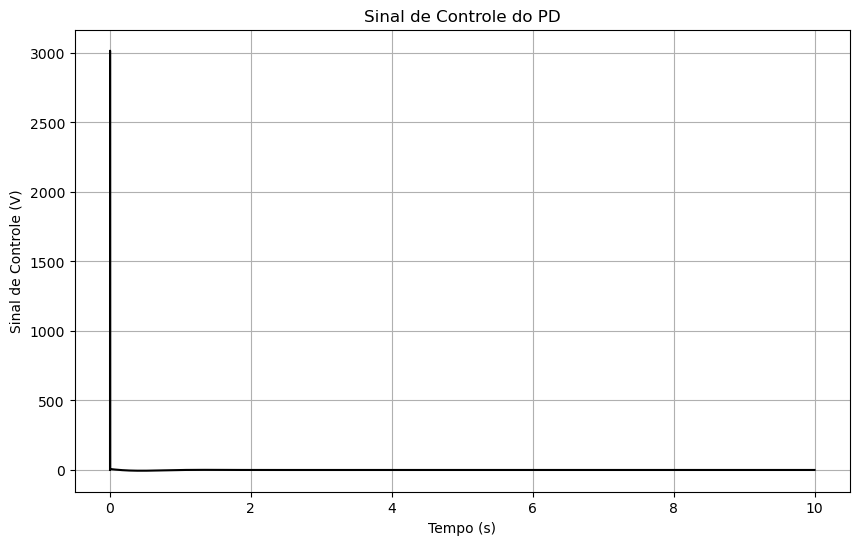

In [2]:
# Início do PLOT
init = 0

# Plotar a saída do controlador
plt.figure(figsize=(10, 6))
plt.plot(time[init:], u_array[init:], color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal de Controle (V)')
plt.title('Sinal de Controle do PD')
plt.grid(True)
plt.show()

- COM SATURADOR

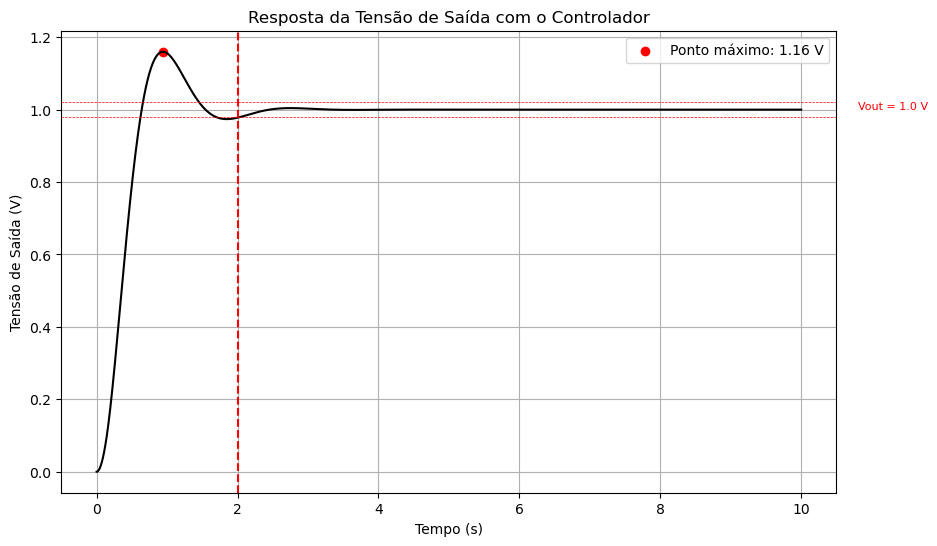

In [3]:
# ---------------- Parâmetros do controlador PID ---------------------
Td = 0.1875      # Definir
Kc = 16          # Definir

kp = Kc
ki = 0
kd = Kc * Td

# ----------------------- Inicialização ------------------------------
time = np.arange(0, sim_time, h)
prev_error = 0
integral = prev_error * h

position = np.zeros_like(time)
velocity = np.zeros_like(time)
u_array = np.zeros_like(time)

# Valores de saturação
U_MAX = 10
U_MIN = -10

# ----------------------- Simulação ---------------------------------
for i in range(1, len(time)):
    # Calcule o erro
    error = setpoint - position[i - 1]

    # Calcule a integral e o derivativo
    integral += error * h
    derivative = (error - prev_error) / h

    # Calcule o sinal de controle usando o controlador PID
    u= kp * error + ki * integral + kd * derivative

    # --------------------- SATURADOR ------------------------------
    if u > U_MAX:
        u = U_MAX
    elif u < U_MIN:
        u = U_MIN
    
    u_array[i] = u
    
    # MANDAR DO CONVERSOR D/A PARA A PLANTA
    # Integre a equação diferencial usando odeint
    y0 = [position[i - 1], velocity[i - 1]]
    y = odeint(plant, y0, [0, h], args=(u,))
    position[i], velocity[i] = y[-1]

    # Atualize o erro anterior
    prev_error = error

# ----------------------- Plot ---------------------------------------
# Tamanho da figura grande
plt.figure(figsize=(10, 6))
plt.plot(time, position, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão de Saída (V)')
plt.title('Resposta da Tensão de Saída com o Controlador')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(position)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = position[indice_ponto_maximo]

# Destaque o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: {y_ponto_maximo:.2f} V')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=2, color='red', linestyle='--')

#### Definir o valor de V onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 0.98*setpoint
ESTAB_MIN = 1.02*setpoint
ESTAB = setpoint
plt.axhline(y=ESTAB_MIN, color='red', linestyle='--', lw=0.5)
plt.axhline(y=ESTAB_MAX, color='red', linestyle='--', lw=0.5)
plt.annotate(f'Vout = {ESTAB} V', (0, ESTAB), (time[-1]+1.3, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.show()

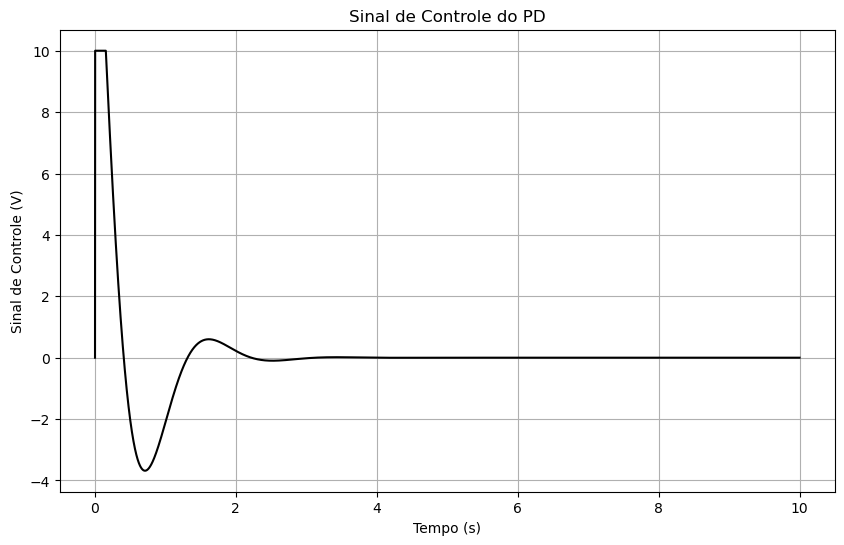

In [4]:
# Início do PLOT
init = 0

# Plotar a saída do controlador
plt.figure(figsize=(10, 6))
plt.plot(time[init:], u_array[init:], color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal de Controle (V)')
plt.title('Sinal de Controle do PD')
plt.grid(True)
plt.show()

### <ins>Conclusões</ins>

Neste trabalho, foi desenvolvido e implementado um controlador digital para o sistema de amplificadores operacionais em cascata, focando em um desempenho de resposta rápida e precisão na regulação da tensão de saída. Através das simulações realizadas, observou-se que o controlador foi capaz de estabilizar a tensão de saída em torno do valor de referência com um tempo de estabilização e overshoot aceitáveis, principalmente com a adição do saturador.